In [55]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [56]:
X, y = make_moons(n_samples=100, noise=0.3, random_state=42)

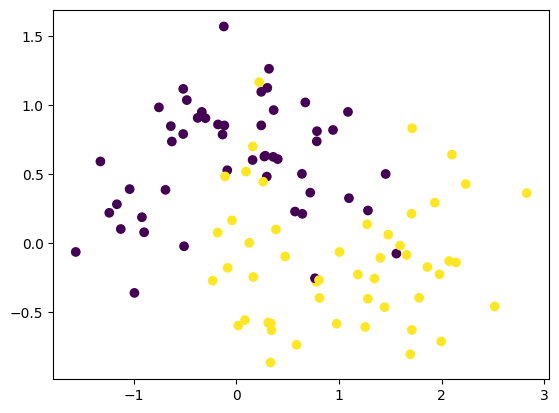

In [57]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [58]:
model_1 = Sequential([
    Input(shape=(2,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [59]:
model_1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
history_1 = model_1.fit(X, y, validation_split=0.2, epochs=1000, verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 184us/step


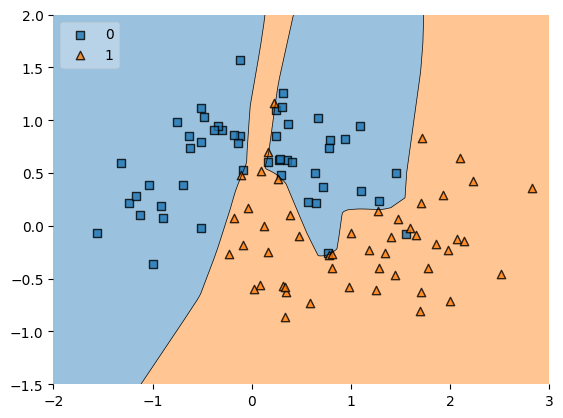

In [60]:
plot_decision_regions(X, y.astype('int'), clf=model_1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

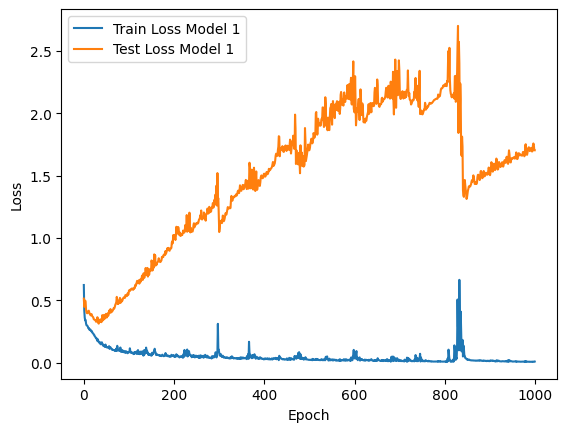

In [61]:
plt.plot(history_1.history['loss'], label='Train Loss Model 1')
plt.plot(history_1.history['val_loss'], label='Test Loss Model 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
model_2 = Sequential([
    Input(shape=(2,)),
    Dense(64, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(1, activation='sigmoid')
])

In [64]:
model_2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
history_2 = model_2.fit(X, y, validation_split=0.2, epochs=1000, verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 177us/step


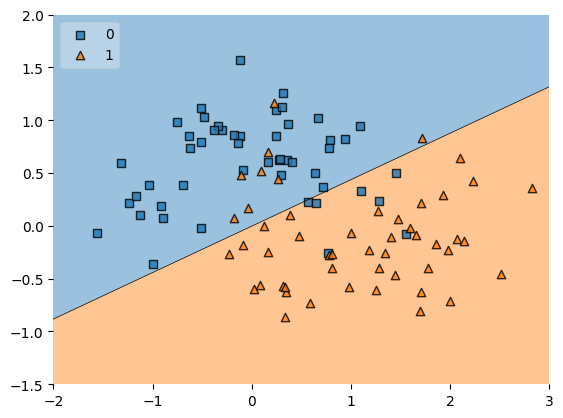

In [65]:
plot_decision_regions(X, y.astype('int'), clf=model_2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

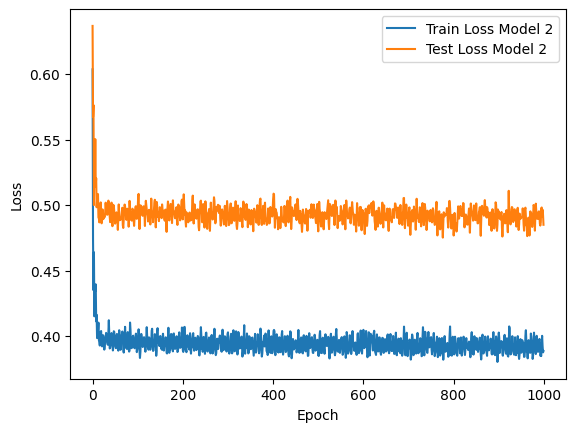

In [66]:
plt.plot(history_2.history['loss'], label='Train Loss Model 2')
plt.plot(history_2.history['val_loss'], label='Test Loss Model 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [79]:
model_1_weight_layer1 = model_1.get_weights()[0].reshape(128)
model_2_weight_layer1 = model_2.get_weights()[0].reshape(128)
print("Model 1 Layer 1 weights mean:", model_1_weight_layer1.mean())
print("Model 2 Layer 1 weights mean:", model_2_weight_layer1.mean())

Model 1 Layer 1 weights mean: -0.20659254
Model 2 Layer 1 weights mean: -0.0030952687


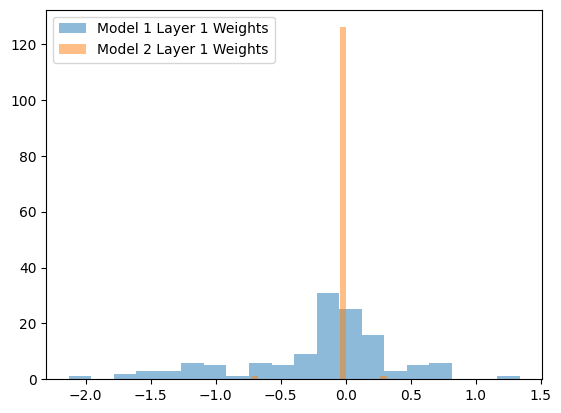

In [80]:
plt.hist(model_1_weight_layer1, bins=20, alpha=0.5, label='Model 1 Layer 1 Weights')
plt.hist(model_2_weight_layer1, bins=20, alpha=0.5, label='Model 2 Layer 1 Weights')
plt.legend()
plt.show()